In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math

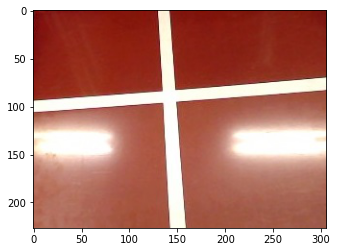

In [14]:
scr = cv2.imread('line2.jpg')
scr_2 = scr.copy()
#scr = cv2.imread('Picture.png')

rgb = scr_2[...,::-1]
plt.imshow(rgb)

In [15]:
def RA(img):
    kernel = np.ones((5,5), np.uint8)
    dilation = cv2.dilate(img, kernel, iterations = 7)
    kernel = np.ones((7,7), np.uint8)
    erosion = cv2.erode(dilation, kernel, iterations = 16)

    r1 = erosion[:,:,2].astype(np.float32) - erosion[:,:,0].astype(np.float32)
    r2 = erosion[:,:,2].astype(np.float32) - erosion[:,:,1].astype(np.float32)
    img1 = cv2.normalize(r1, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_8U)
    img2 = cv2.normalize(r2, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_8U)

    bitwiseAnd = cv2.bitwise_and(img1, img2)

    ret, thresh1 = cv2.threshold(bitwiseAnd, 0, 255, cv2.THRESH_BINARY)
    plt.imshow(cv2.cvtColor(thresh1, cv2.COLOR_BGR2RGB))
    
    return thresh1

In [16]:
def RC(img):
    r3 = scr_2[:,:,2].astype(np.float32) - scr_2[:,:,0].astype(np.float32)
    r4 = scr_2[:,:,2].astype(np.float32) - scr_2[:,:,1].astype(np.float32)    
    img3 = cv2.normalize(r3, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_8U)
    img4 = cv2.normalize(r4, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_8U)
    
    bitwiseAnd2 = cv2.bitwise_and(img3, img4)
    
    ret, thresh2 = cv2.threshold(bitwiseAnd2, 0, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(cv2.cvtColor(thresh2, cv2.COLOR_BGR2RGB))
    
    return thresh2

In [17]:
def Merge_Thinning_Edges(img1, img2):
    img = cv2.bitwise_and(img1, img2)
    size = np.size(img)
    skel = np.zeros(img.shape,np.uint8)

    ret,img = cv2.threshold(img,127,255,0)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    done = False
    while( not done):
        eroded = cv2.erode(img,element)
        temp = cv2.dilate(eroded,element)
        temp = cv2.subtract(img,temp)
        skel = cv2.bitwise_or(skel,temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros==size:
            done = True
            
    plt.imshow(cv2.cvtColor(skel, cv2.COLOR_BGR2RGB))
            
#     thinned = cv2.ximgproc.thinning(bitwiseAnd3)
    edges = cv2.Canny(skel, 50, 150, apertureSize = 3)
    #plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
    
    return edges

In [18]:
num = int(3)
num60_sqrt = (cmath.sqrt(num))
tan60_slope = float(num60_sqrt.real)
print(tan60_slope)

1.7320508075688772


In [19]:
def HoughLinesP(img, Original):
    lines = cv2.HoughLinesP(img, 1, np.pi/180, 100, minLineLength=100, maxLineGap=180)
    lines_data_straight = np.empty([0,10])
    lines_data_horizontal = np.empty([0,10]) #横
    lines_data = np.empty([0,10])

    #num = int(3)
    ##num30_sqrt = (cmath.sqrt(num))/num
    #tan30_slope = float(num30_sqrt.real)
    
    #num60_sqrt = (cmath.sqrt(num))
    #tan60_slope = float(num60_sqrt.real)
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            if(x2-x1 != 0):
        #       slope = abs((y2-y1)/(x2-x1))
                slope = (y1-y2)/(x1-x2)
        #         Linear_Equation_A = abs(y2 - y1)
        #         Linear_Equation_B = abs(x1 - x2)
        #         Linear_Equation_C = abs(x1 * y2 - x2 * y1)
                Linear_Equation_A = -slope
                Linear_Equation_B = 1
                Linear_Equation_C = y1-slope*x1
                ##a = np.array([(x1,x2,y1,y2,Linear_Equation_A,Linear_Equation_B,Linear_Equation_C,0,rho,theta)])
                ##lines_data = np.append(lines_data,a, axis=0)
                print(slope)
                #print(Linear_Equation_A)
                #print(Linear_Equation_B)
                #print(Linear_Equation_C,'\n')
                
                if slope < 0:
                    angle_in_radians = math.atan(slope)
                    angle_in_degrees = 360 + (math.degrees(angle_in_radians)) 
                elif slope > 0:
                    angle_in_radians = math.atan(slope)
                    angle_in_degrees = math.degrees(angle_in_radians)
                else:
                    print('nan')
                                    
                print(angle_in_degrees)
                
                #horizontal识别码设为1
                if 0 < angle_in_degrees < 30 or  330 < angle_in_degrees < 360:
                    
                    cv2.line(Original, (x1, y1), (x2, y2), (0, 255, 0), 3)
                    print("(",x1,",",y1,") ",'(',x2,",",y2,')')
                    cv2.circle(Original, (x1,y1), 5, (0,255,0), -1)
                    cv2.circle(Original, (x2,y2), 5, (0,255,0), -1)
                    
                    a = np.array([(Linear_Equation_A, Linear_Equation_B, Linear_Equation_C,slope,x1,x2,y1,y2,angle_in_degrees,1)])
                    lines_data_horizontal = np.append(lines_data_horizontal,a, axis=0)
                    #print(lines_data_horizontal)
                    print('h')
                    
                #straight识别码设为0   
                elif 60 < angle_in_degrees < 90 or  240 < angle_in_degrees < 360:
                    
                    cv2.line(Original, (x1, y1), (x2, y2), (0, 255, 0), 1)
                    print("(",x1,",",y1,") ",'(',x2,",",y2,')')
                    cv2.circle(Original, (x1,y1), 5, (0,255,0), -1)
                    cv2.circle(Original, (x2,y2), 5, (0,255,0), -1)
                    
                    b = np.array([(Linear_Equation_A, Linear_Equation_B, Linear_Equation_C,slope,x1,x2,y1,y2,angle_in_degrees,0)])
                    lines_data_straight = np.append(lines_data_straight,b, axis=0)  
                    print('s')
                    #print(lines_data_straight)
                    
                else:
                    print('nan')
                '''
                A = y2 - y1;
                B = x1 - x2;
                C = x1 * y2 - x2 * y1;
                ''' 
            else:
                slope = 0
                #识别码设为2
                #a = np.array([(Linear_Equation_A, Linear_Equation_B, Linear_Equation_C,slope,x1,x2,y1,y2,2)])
                #lines_data = np.append(lines_data,a, axis=0)

        print(Original.shape)
    else:
        print('Nothing!!')
        
    plt.imshow(cv2.cvtColor(Original, cv2.COLOR_BGR2RGB))
           
    return Original, lines_data_straight, lines_data_horizontal

In [20]:
def Intersection(img, lines_data_straight, lines_data_horizontal):
    for i in range(len(lines_data_straight)):
            A = np.array([[lines_data_straight[i][0], lines_data_straight[i][1]], [lines_data_horizontal[i][0], lines_data_horizontal[i][1]]])        
            try:
                inv_A = np.linalg.inv(A)
            except np.linalg.LinAlgError:
                print('error') 

            B = np.array([lines_data_straight[i][2], lines_data_horizontal[i][2]])
            try:
                ans = np.linalg.inv(A).dot(B)
                c_x = int(ans[0])
                c_y = int(ans[1])
                if  0 < c_x < 1000 and 0 < c_y < 1000:
                    # print((c_x, c_y))                    
                    cv2.circle(img, (c_x, c_y), 5, (0,0,255), -1)                    
                    cv2.line(img,(c_x,0),(c_x,c_y),(255,0,0),3)#竖向
                    cv2.line(img,(1000,c_y),(c_x,c_y),(255,0,0),3)#横向

                    print('X:', c_x)
                    print('Y:', c_y)
                    
                    if lines_data_horizontal[i][9] == 1:
                        L_x = int(lines_data_horizontal[i][4])
                        L_y = int(lines_data_horizontal[i][6])
                        
                        R_x = int(lines_data_horizontal[i][5])
                        R_y = int(lines_data_horizontal[i][7])
                        
                        imx = int(lines_data_straight[i][4])
                        imy = int(lines_data_straight[i][6])
                        xm1 = int(imx-imy/lines_data_straight[i][3])
         
                        deg = lines_data_horizontal[i][8]
                        if deg < 90:
                            cv2.line(img,(L_x, L_y),(c_x,c_y),(0,0,255),3)#竖向
                        else:
                            cv2.line(img,(R_x, R_y),(c_x,c_y),(0,0,255),3)#横向
                            
                        cv2.putText(img, str(deg)[0:5]+' degree', (c_x+50, c_y+45), cv2.FONT_HERSHEY_PLAIN, 1,(255,255,0),1)
                        cv2.line(img,(xm1,0),(c_x,c_y),(255,255,0),3)#中心定位
                        print(deg)
                        
            except np.linalg.LinAlgError:
                print('error')

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    return img

In [21]:
# def Angle(img, angle_data, point):
#     for i in range(len(angle_data)):
#         for j in range(i+1,len(angle_data)):
            
#             Ax = int(angle_data[i][2])
#             Ay = int(angle_data[i][3])
            
#             x = int(point[i][0])
#             y = int(point[i][1])
            
#             cv2.line(img,(Ax, Ay),(x,y),(0,0,255),3)#横向

#             inv = np.arctan(angle_data[i][4]) 
#             deg = np.degrees(inv)

#             cv2.putText(img, str(deg)[0:5]+' degree', (x+50, y+45), cv2.FONT_HERSHEY_PLAIN, 1,(255,255,0),1)

#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))        

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


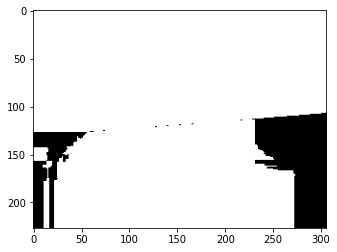

In [22]:
area = RA(scr_2)
print(area)

[[255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


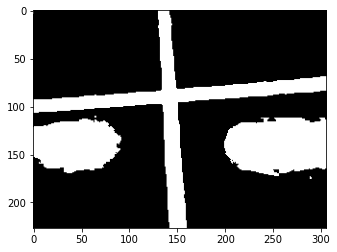

In [23]:
color = RC(scr_2)
print(color)

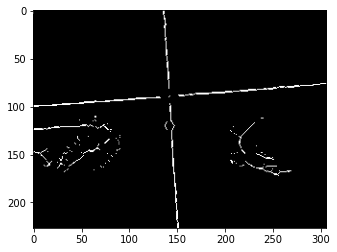

In [24]:
edges = Merge_Thinning_Edges(area, color)

-0.06885245901639345
356.0612609161488
( 0 , 98 )  ( 305 , 77 )
h
14.466666666666667
86.0457522844789
( 135 , 5 )  ( 150 , 222 )
s
(227, 306, 3)


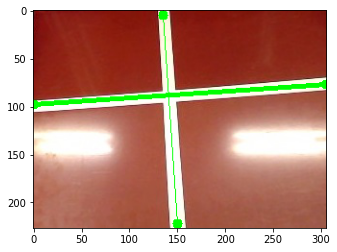

In [25]:
Line = HoughLinesP(edges, scr_2)
new_img = Line[0]
straight = Line[1]
horizontal = Line[2]

In [14]:
print(straight)

[[-1.86666667e+01  1.00000000e+00 -2.53766667e+03  1.86666667e+01
   1.36000000e+02  1.48000000e+02  1.00000000e+00  2.25000000e+02
   8.69335145e+01  0.00000000e+00]
 [-1.87500000e+01  1.00000000e+00 -2.56875000e+03  1.87500000e+01
   1.37000000e+02  1.49000000e+02  0.00000000e+00  2.25000000e+02
   8.69471175e+01  0.00000000e+00]]


X: 140
Y: 88
354.924547621521
X: 141
Y: 90
355.11159905187526


array([[[ 32,  34,  92],
        [ 29,  31, 102],
        [ 24,  24, 118],
        ...,
        [  7,  17, 111],
        [ 26,  24, 114],
        [ 26,  24, 114]],

       [[ 32,  34,  92],
        [ 28,  30, 101],
        [ 19,  19, 113],
        ...,
        [ 13,  21, 115],
        [ 23,  23, 113],
        [ 23,  23, 113]],

       [[ 31,  32,  92],
        [ 29,  30, 104],
        [ 19,  19, 113],
        ...,
        [ 13,  21, 115],
        [ 20,  20, 114],
        [ 20,  20, 114]],

       ...,

       [[ 81,  99, 176],
        [ 79,  97, 174],
        [ 79,  98, 173],
        ...,
        [ 72,  91, 159],
        [ 75,  92, 159],
        [ 75,  92, 159]],

       [[ 83, 101, 178],
        [ 81,  99, 176],
        [ 81, 100, 175],
        ...,
        [ 71,  90, 158],
        [ 73,  90, 157],
        [ 73,  90, 157]],

       [[ 84, 102, 179],
        [ 83, 101, 178],
        [ 83, 102, 177],
        ...,
        [ 70,  89, 157],
        [ 72,  89, 156],
        [ 72,  89, 156]]

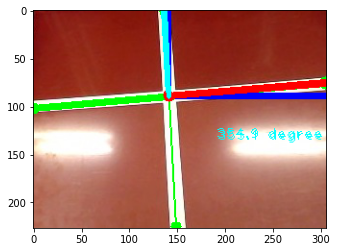

In [15]:
Intersection(new_img, straight, horizontal)

In [16]:
print(straight.shape)

(2, 10)


In [17]:
print(horizontal.shape)

(2, 10)


In [18]:
# for i in range(len(angle)):
#     print(angle[i][2])
#     print(angle[i][3])

In [19]:
# for i in range(len(angle)):
#     print(angle[i][2])
#     print(angle[i][3])